# data

In [1]:
# pip install scikit-learn-extra

In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [2]:
metadata=pd.read_csv("covid.csv")
metadata.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,3/31/2020,0,0,0,0,0,negative,No,male,Other
1,3/31/2020,0,0,0,0,0,negative,No,female,Other
2,3/31/2020,0,0,0,0,0,negative,No,male,Other
3,3/31/2020,0,0,0,0,0,positive,No,female,Other
4,3/31/2020,1,0,0,0,0,negative,No,male,Abroad
5,3/31/2020,1,1,0,1,0,positive,No,male,Other
6,3/31/2020,0,0,0,0,0,negative,No,male,Other
7,3/31/2020,0,0,0,0,0,negative,No,male,Other
8,3/31/2020,0,0,0,0,0,negative,No,male,Other
9,3/31/2020,0,0,0,0,0,negative,No,male,Other


In [3]:
metadata.shape

(53843, 10)

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53843 non-null  object
 2   fever                53843 non-null  object
 3   sore_throat          53843 non-null  int64 
 4   shortness_of_breath  53843 non-null  int64 
 5   head_ache            53843 non-null  int64 
 6   corona_result        53843 non-null  object
 7   age_60_and_above     53843 non-null  object
 8   gender               53843 non-null  object
 9   test_indication      53843 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [5]:
metadata.drop('test_date', axis=1, inplace=True)

In [6]:
metadata.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,NaN,NaN,53021.0,53189.0,52648.0,NaN,NaN,NaN,NaN
1,NaN,NaN,822.0,654.0,1195.0,NaN,NaN,NaN,NaN
0,45773.0,49032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8054.0,4794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5041.0
Contact with confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0
No,NaN,NaN,NaN,NaN,NaN,NaN,45994.0,NaN,NaN
None,16.0,17.0,NaN,NaN,NaN,NaN,NaN,1194.0,NaN
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45702.0
Yes,NaN,NaN,NaN,NaN,NaN,NaN,7849.0,NaN,NaN


In [7]:
test=metadata.copy()
test['cough']=test['cough'].replace(['1','0','None'],[1, 0, np.nan])
test['fever']=test['fever'].replace(['1', '0','None'],[1, 0, np.nan])
test['sore_throat']=test['sore_throat'].replace(['1','0','None'],[1,0,np.nan])
test['shortness_of_breath']=test['shortness_of_breath'].replace(['1','0','None'],[1,0,np.nan])
test['head_ache']=test['head_ache'].replace(['1','0','None'],[1,0,np.nan])
test['gender']=test['gender'].replace(['female', 'male', 'None'], [0, 1, np.nan])
test['age_60_and_above']=test['age_60_and_above'].replace(['None', 'No', 'Yes'], [np.nan, 0 ,1])
test['test_indication']=test['test_indication'].replace(['Contact with confirmed', 'Other', 'Abroad'], [1, 0, 0])
test['corona_result']=test['corona_result'].replace(['negative', 'positive'], [0, 1])

test

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1.0,0
1,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0,0,0,0,1.0,0
3,0,0,0,0,0,1,0,0.0,0
4,1,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...
53838,1,1,0,0,0,0,1,0.0,0
53839,1,1,1,0,1,0,0,0.0,0
53840,1,0,0,0,0,0,0,0.0,0
53841,1,0,0,0,0,0,0,1.0,0


In [8]:
test.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,NaN,NaN,53021.0,53189.0,52648.0,48225.0,45994.0,26436.0,50743.0
1,NaN,NaN,822.0,654.0,1195.0,4795.0,7849.0,26213.0,3100.0
0,45773.0,49032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8054.0,4794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other,NaN,NaN,NaN,NaN,NaN,823.0,NaN,NaN,NaN


In [9]:
test.drop(test[test['corona_result']=='other'].index, inplace=True)
test.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,NaN,NaN,52213.0,52382.0,51843.0,48225.0,45317.0,26037.0,49978.0
1,NaN,NaN,807.0,638.0,1177.0,4795.0,7703.0,25794.0,3042.0
0,45060.0,48292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7944.0,4711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
np.random.seed(2022)
test.age_60_and_above.fillna(np.random.randint(0, 1), inplace =True)
test.cough.fillna(np.random.randint(0, 1), inplace =True)
test.fever.fillna(np.random.randint(0, 1), inplace =True)
test.sore_throat.fillna(np.random.randint(0, 1), inplace =True)
test.shortness_of_breath.fillna(np.random.randint(0, 1), inplace =True)
test.head_ache.fillna(np.random.randint(0, 1), inplace =True)
test.gender.fillna(np.random.randint(0, 1), inplace =True)
test.test_indication.fillna(np.random.randint(0, 1), inplace =True)

test.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,16.0,17.0,52213.0,52382.0,51843.0,48225.0,45317.0,27226.0,49978.0
1,NaN,NaN,807.0,638.0,1177.0,4795.0,7703.0,25794.0,3042.0
0,45060.0,48292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7944.0,4711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test.cough=test.cough.astype('int8')
test.fever=test.fever.astype('int8')
test.gender=test.gender.astype('int8')
test.corona_result=test.corona_result.astype('int8')

In [12]:
test.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,45076,48309,52213,52382,51843,48225,45317,27226,49978
1,7944,4711,807,638,1177,4795,7703,25794,3042


In [16]:
test.shape

(53020, 9)

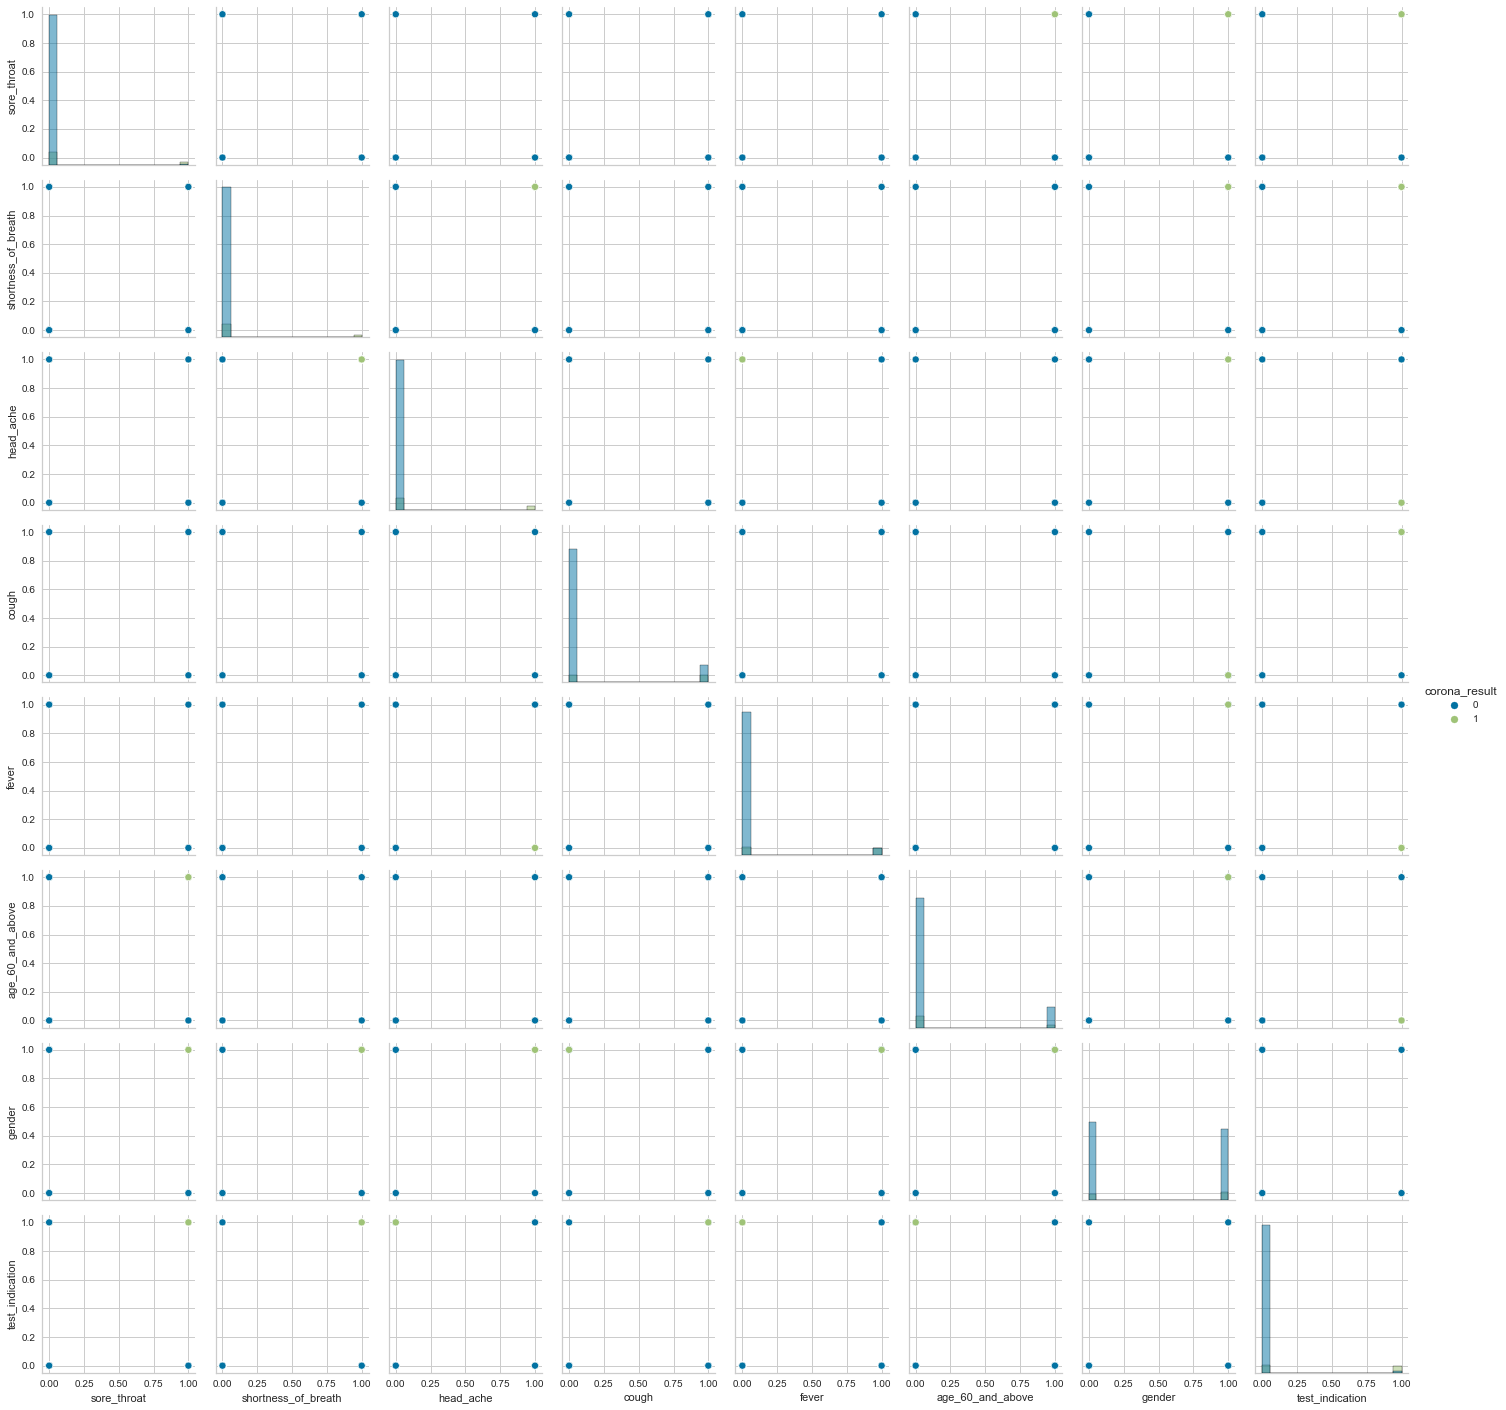

In [14]:
x_vars = ["sore_throat", "shortness_of_breath", "head_ache", "cough", "fever", "age_60_and_above", "gender", "test_indication"]
y_vars = ["corona_result"]
g = sns.PairGrid(test, hue='corona_result',x_vars=x_vars, y_vars=x_vars)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.scatterplot)
g.add_legend()

# one hot encoding

In [15]:
# data_dum = pd.get_dummies(metadata)
# pd.DataFrame(data_dum)

In [16]:
# data_dum.apply(pd.Series.value_counts)

In [17]:
# data_dum.isnull().sum()

In [18]:
# # Visualize the correlation your data and identify variables for further analysis
# # g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# g = sns.PairGrid(data_dum, corner=True)
# g.map(sns.scatterplot)
# # g.map(sns.histplot)
# # g.add_legend(title="", adjust_subtitles=True)
# g.add_legend()

# correlation

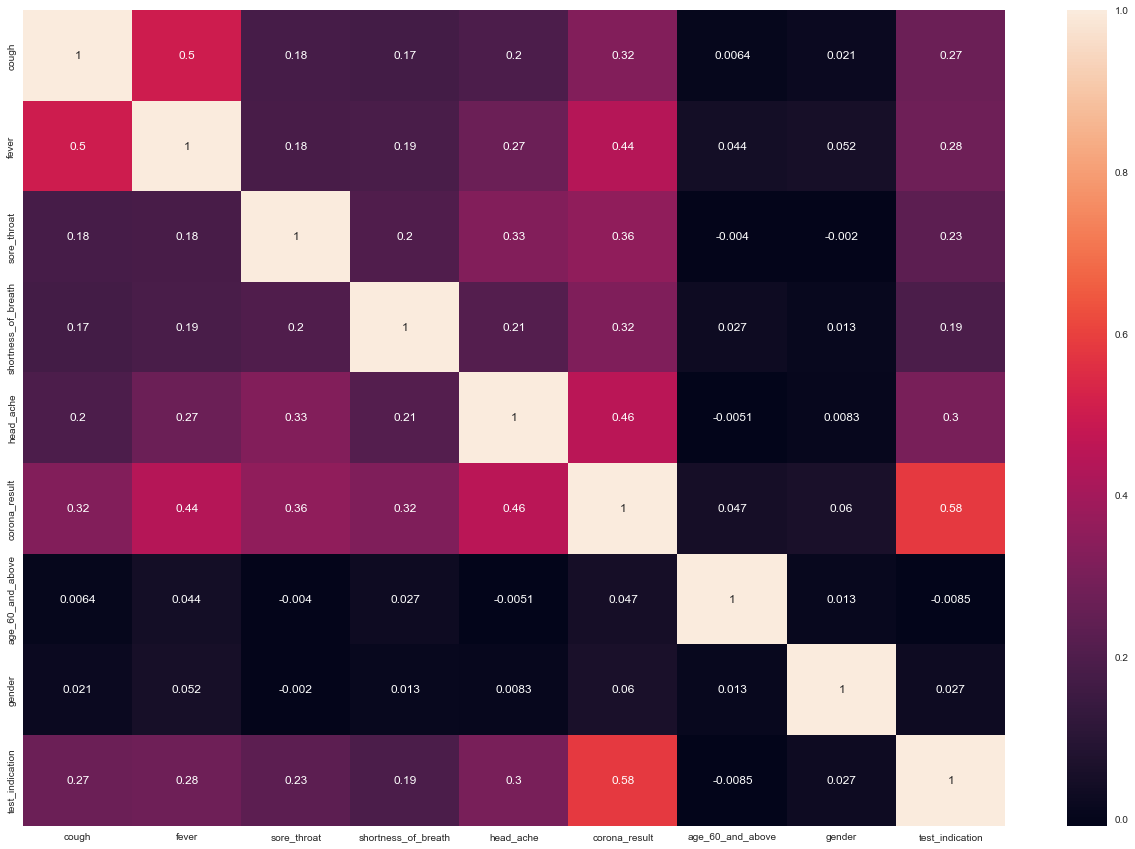

In [15]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(test.corr(), annot=True)
plt.show()

# KMeans

In [17]:
random_state=2022

In [18]:
silhouette_avg = []
inertia_list = []
for i in range(2,15):
    kmeans_fit = KMeans(n_clusters = i, init='k-means++', random_state=random_state).fit(test)
    silhouette_avg.append(silhouette_score(test, kmeans_fit.labels_))
    inertia_list.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

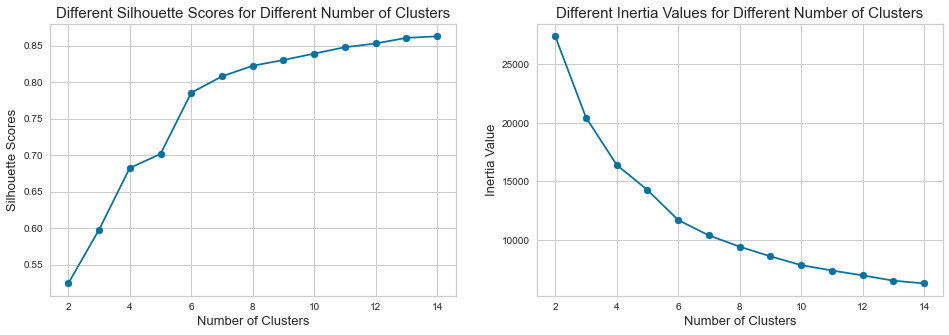

In [19]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(2, 15), silhouette_avg)
plt.scatter(range(2, 15), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(2,15),inertia_list)
plt.scatter(range(2,15),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

In [21]:
# kmeans = KMeans()
# kviz = KElbowVisualizer(kmeans, k=(3,13), metric='silhouette', timings=False)
# kviz.fit(test)
# kviz.show()
# plt.show()

In [20]:
#Train the Model
kmeans = KMeans(n_clusters=6, init='k-means++',random_state=random_state).fit(test)
test['cluster'] = kmeans.labels_

In [21]:
test.sort_values(by='cluster')

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,cluster
53842,1,0,0,0,0,0,0,1,0,0
42991,1,1,0,0,0,0,0,1,0,0
42993,1,1,0,0,0,0,0,1,0,0
43000,1,1,0,0,0,0,0,1,0,0
43002,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
29597,0,0,0,0,0,0,1,0,0,5
22111,0,0,0,0,0,0,1,0,0,5
49027,1,0,0,0,0,0,1,0,0,5
22098,0,0,0,0,0,0,1,0,0,5


inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [22]:
kmeans.inertia_

11693.33111058572

查看各cluster的中心，並在圖上畫出

In [23]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  3.74345042e-01,  7.37434504e-03,
         6.01591306e-03,  3.29904910e-03,  1.78536775e-02,
         6.22938094e-02,  4.72734330e-01,  8.77158937e-02],
       [-3.19189120e-15,  9.22745681e-03,  1.48664582e-03,
         6.66427436e-04,  1.43538217e-03,  1.07653663e-02,
         1.63757896e-15,  7.71605002e-15,  4.25488286e-03],
       [-2.22044605e-15,  1.10287880e-02,  1.13115774e-03,
         9.61484079e-04,  3.39347322e-04,  1.49312822e-02,
         6.66133815e-16,  1.00000000e+00,  6.10825180e-03],
       [ 5.89105980e-02,  2.48667851e-02,  2.36826525e-03,
         2.96033156e-03,  2.36826525e-03,  6.92717584e-02,
         1.00000000e+00,  1.00000000e+00,  1.95381883e-02],
       [ 6.06170599e-01,  5.88540316e-01,  1.83303085e-01,
         1.43375681e-01,  2.87788437e-01,  9.95333160e-01,
         1.45190563e-01,  5.96059113e-01,  5.85688359e-01],
       [ 7.37514518e-02,  1.53890825e-02,  1.45180023e-03,
         4.06504065e-03,  2.32288037e-03,  4.529616

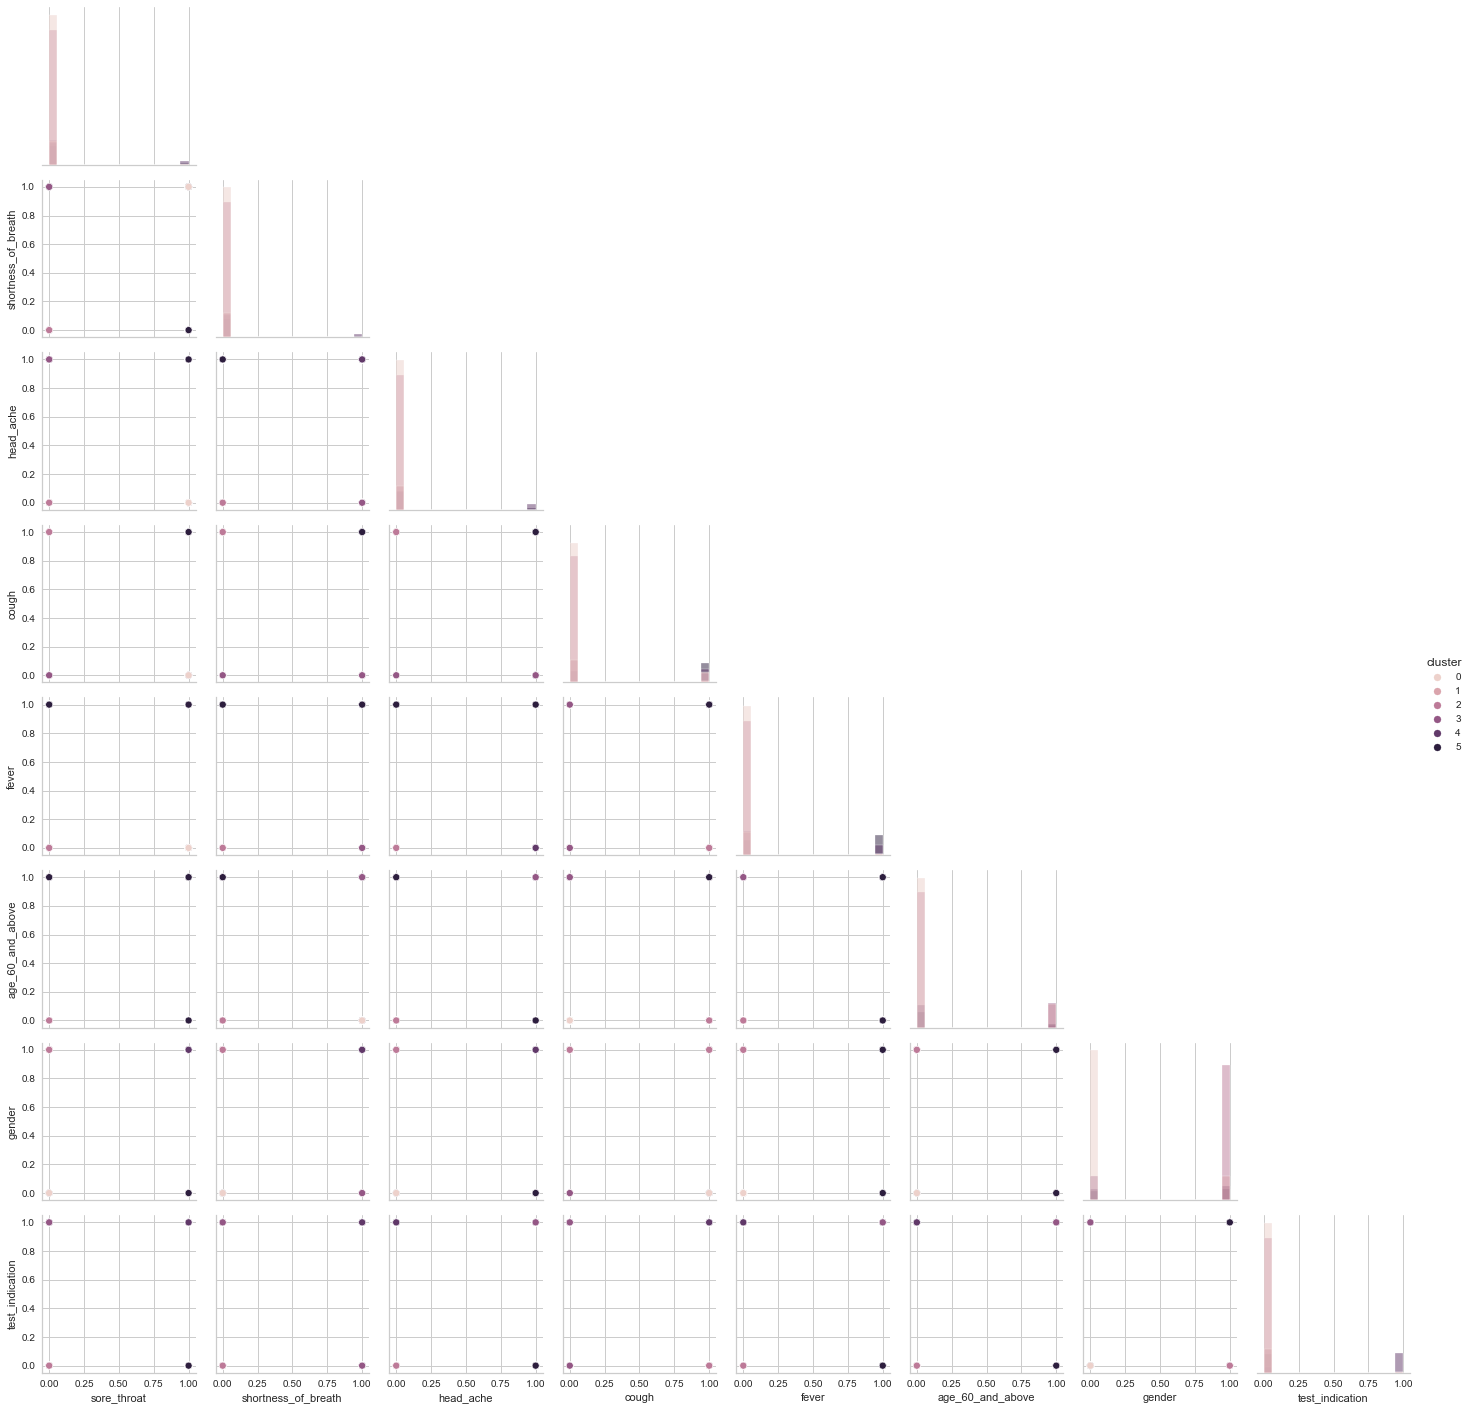

In [31]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(test, hue='cluster',x_vars=x_vars, y_vars=x_vars, corner=True)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

In [24]:
all=test.copy()
all.drop(['cluster'],axis=1,  inplace=True)
all.insert(0, 'counts', len(all.index))
all=all.mean(axis=0)
all

counts                 53020.000000
cough                      0.149830
fever                      0.088853
sore_throat                0.015221
shortness_of_breath        0.012033
head_ache                  0.022199
corona_result              0.090438
age_60_and_above           0.145285
gender                     0.486496
test_indication            0.057375
dtype: float64

In [25]:
def cluster(metadata, data, num):
    cluster=metadata[metadata['cluster']==num]
    cluster.insert(0, 'counts',len(cluster.index))
    cluster=cluster.mean(axis=0)
    data=pd.concat([data, cluster], axis=1, join='inner')
    return data

In [26]:
for i in range(6):
    all= cluster(test, all, i)

In [27]:
all

,0,1,0,0,0,0,0
counts,53020.000000,5153.000000,19507.000000,17681.000000,3378.000000,3857.000000,3444.000000
cough,0.149830,1.000000,0.000000,0.000000,0.058911,0.606171,0.073751
fever,0.088853,0.374345,0.009227,0.011029,0.024867,0.588540,0.015389
sore_throat,0.015221,0.007374,0.001487,0.001131,0.002368,0.183303,0.001452
shortness_of_breath,0.012033,0.006016,0.000666,0.000961,0.002960,0.143376,0.004065
head_ache,0.022199,0.003299,0.001435,0.000339,0.002368,0.287788,0.002323
corona_result,0.090438,0.017854,0.010765,0.014931,0.069272,0.995333,0.045296
age_60_and_above,0.145285,0.062294,0.000000,0.000000,1.000000,0.145191,1.000000
gender,0.486496,0.472734,0.000000,1.000000,1.000000,0.596059,0.000000
test_indication,0.057375,0.087716,0.004255,0.006108,0.019538,0.585688,0.021487


In [28]:
all.columns=['all', 'cluser 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
all

,all,cluser 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
counts,53020.000000,5153.000000,19507.000000,17681.000000,3378.000000,3857.000000,3444.000000
cough,0.149830,1.000000,0.000000,0.000000,0.058911,0.606171,0.073751
fever,0.088853,0.374345,0.009227,0.011029,0.024867,0.588540,0.015389
sore_throat,0.015221,0.007374,0.001487,0.001131,0.002368,0.183303,0.001452
shortness_of_breath,0.012033,0.006016,0.000666,0.000961,0.002960,0.143376,0.004065
head_ache,0.022199,0.003299,0.001435,0.000339,0.002368,0.287788,0.002323
corona_result,0.090438,0.017854,0.010765,0.014931,0.069272,0.995333,0.045296
age_60_and_above,0.145285,0.062294,0.000000,0.000000,1.000000,0.145191,1.000000
gender,0.486496,0.472734,0.000000,1.000000,1.000000,0.596059,0.000000
test_indication,0.057375,0.087716,0.004255,0.006108,0.019538,0.585688,0.021487


## as_preprocessing

In [29]:
from sklearn.model_selection import train_test_split

from sklearn import metrics, ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53020 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cough                53020 non-null  int8 
 1   fever                53020 non-null  int8 
 2   sore_throat          53020 non-null  int64
 3   shortness_of_breath  53020 non-null  int64
 4   head_ache            53020 non-null  int64
 5   corona_result        53020 non-null  int8 
 6   age_60_and_above     53020 non-null  int64
 7   gender               53020 non-null  int8 
 8   test_indication      53020 non-null  int64
 9   cluster              53020 non-null  int32
dtypes: int32(1), int64(5), int8(4)
memory usage: 4.8 MB


In [31]:
result_df = pd.DataFrame(columns=['model_type', 'Accuracy', 'AUC', 'F1-score','Precision','Recall'])
roc_auc_all = {}

### all_features

In [32]:
y=test.corona_result

features_all=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_all =test[features_all]

In [33]:
X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
print(sorted(Counter(y_resampled_all_re).items()))

[(0, 48225), (1, 48225)]


### train_test_split

In [34]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_resampled_all_re, y_resampled_all_re, test_size=0.2, random_state=random_state)

In [35]:
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,0,0,1,1,4
26247,0,0,0,0,0,0,1,0,2
18022,0,0,0,0,0,0,1,0,2
36027,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2
63301,0,0,1,0,0,0,1,0,2
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,2


### XGBoost

In [36]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              slient=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [37]:
model_type="XGBoost (all) SMOTE"
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [38]:
result=X_test_all.copy()
result["corona_result"]=y_test_all
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,0,0,1,1,4
26247,0,0,0,0,0,0,1,0,2
18022,0,0,0,0,0,0,1,0,2
36027,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2
63301,0,0,1,0,0,0,1,0,2
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,2


In [39]:
result["xgb_all"]=predicted_all
result

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
34771,0,0,0,0,0,0,0,0,1,0,0
68146,0,1,0,0,0,0,1,1,4,1,1
26247,0,0,0,0,0,0,1,0,2,0,0
18022,0,0,0,0,0,0,1,0,2,0,0
36027,0,0,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2,0,0
63301,0,0,1,0,0,0,1,0,2,1,1
26577,0,0,0,0,0,0,0,0,1,0,0
35688,0,0,0,0,0,0,1,0,2,0,0


In [40]:
xgb_all_fn=result[(result['corona_result']==1) & (result['xgb_all']==0)]
xgb_all_fn.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
0,1041.0,1291.0,1288.0,1291.0,1291.0,1019.0,654.0,1291.0,208,NaN,1291.0
1,250.0,NaN,3.0,NaN,NaN,272.0,637.0,NaN,320,1291.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN


#### False Positive

In [41]:
xgb_all_fp=result[(result['corona_result']==0) & (result['xgb_all']==1)]
xgb_all_fp.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
0,18.0,52.0,61.0,56.0,55.0,10.0,12.0,51.0,2,63.0,NaN
1,45.0,11.0,2.0,7.0,8.0,53.0,51.0,12.0,3,NaN,63.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN


Accuracy: 0.93
Auc: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9621
           1       0.99      0.87      0.93      9669

    accuracy                           0.93     19290
   macro avg       0.94      0.93      0.93     19290
weighted avg       0.94      0.93      0.93     19290



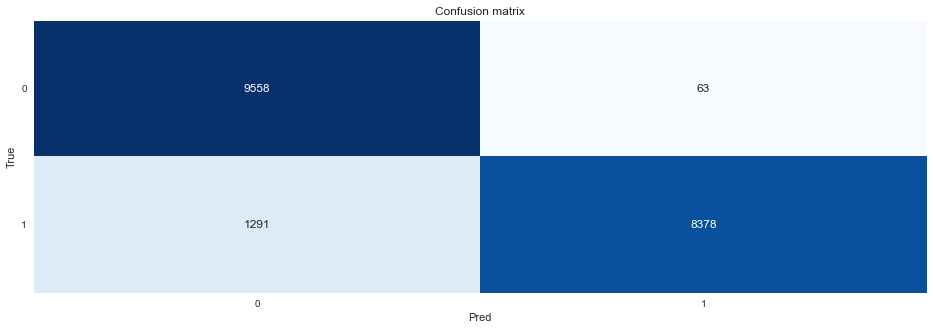

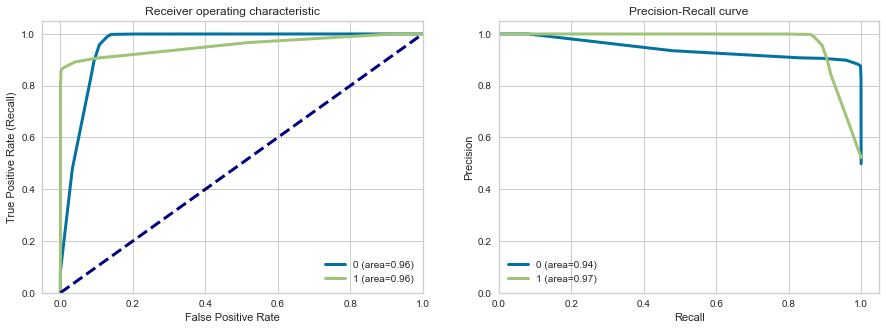

In [42]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# 把結果加進result_df
result_df = result_df.append({'model_type': model_type, 'Accuracy': accuracy, 'AUC': auc,
                             'F1-score': f1, 'Recall': recall_all, 'Precision': precision_all}, ignore_index=True)
roc_auc_all[model_type] = roc_auc

### Gradient Boosting

In [43]:
model_type="Gradient Boosting (all) SMOTE"
gb_all = GradientBoostingClassifier()
gb_all.fit(X_train_all, y_train_all)

GradientBoostingClassifier()

In [44]:
predicted_all = gb_all.predict(X_test_all)
predicted_prob_all = gb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [45]:
result_gb=X_test_all.copy()
result_gb["corona_result"]=y_test_all
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,0,0,1,1,4
26247,0,0,0,0,0,0,1,0,2
18022,0,0,0,0,0,0,1,0,2
36027,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2
63301,0,0,1,0,0,0,1,0,2
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,2


In [46]:
result_gb["gb_all"]=predicted_all
result_gb

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all
34771,0,0,0,0,0,0,0,0,1,0,0
68146,0,1,0,0,0,0,1,1,4,1,1
26247,0,0,0,0,0,0,1,0,2,0,0
18022,0,0,0,0,0,0,1,0,2,0,0
36027,0,0,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2,0,0
63301,0,0,1,0,0,0,1,0,2,1,1
26577,0,0,0,0,0,0,0,0,1,0,0
35688,0,0,0,0,0,0,1,0,2,0,0


In [47]:
gb_all_fn=result_gb[(result_gb['corona_result']==1) & (result_gb['gb_all']==0)]
gb_all_fn.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all
0,1041.0,1291.0,1288.0,1291.0,1291.0,1019.0,654.0,1291.0,208,NaN,1291.0
1,250.0,NaN,3.0,NaN,NaN,272.0,637.0,NaN,320,1291.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN


#### False Positive

In [48]:
gb_all_fp=result_gb[(result_gb['corona_result']==0) & (result_gb['gb_all']==1)]
gb_all_fp.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all
0,17.0,54.0,61.0,59.0,60.0,9.0,11.0,52.0,2,65.0,NaN
1,48.0,11.0,4.0,6.0,5.0,56.0,54.0,13.0,1,NaN,65.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN


Accuracy: 0.93
Auc: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9621
           1       0.99      0.87      0.93      9669

    accuracy                           0.93     19290
   macro avg       0.94      0.93      0.93     19290
weighted avg       0.94      0.93      0.93     19290



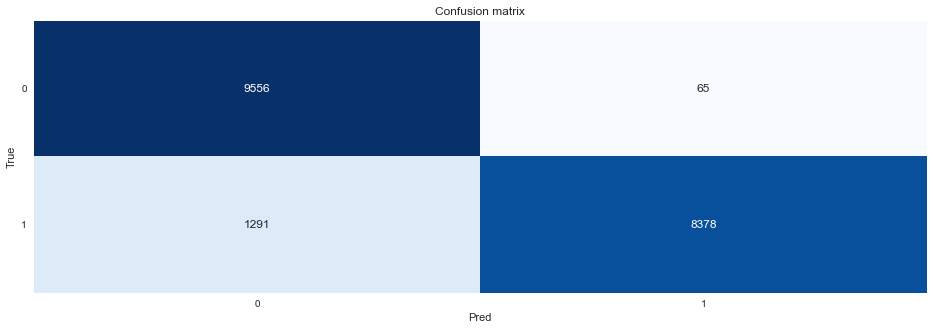

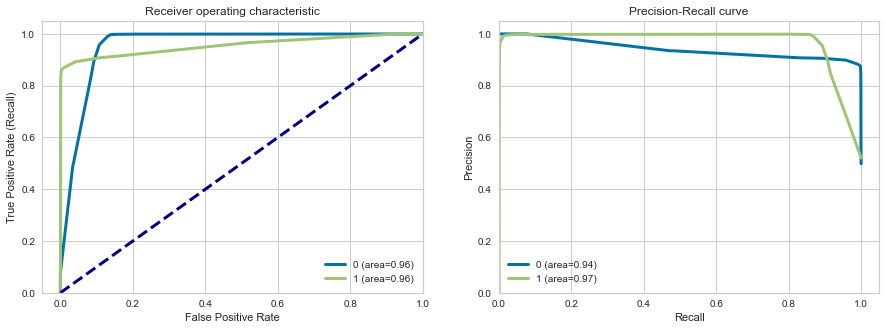

In [49]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all)
precision_all=precision_score(y_test_all, predicted_all)
recall_all=recall_score(y_test_all, predicted_all)

print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# 把結果加進result_df
result_df = result_df.append({'model_type': model_type, 'Accuracy': accuracy, 'AUC': auc, 'F1-score': f1, 'Recall':recall_all, 'Precision':precision_all}
                             , ignore_index=True)
roc_auc_all[model_type] = roc_auc

# DBSCAN

In [59]:
data=test.copy()
data.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,cluster
0,45076.0,48309.0,52213.0,52382.0,51843.0,48225.0,45317.0,27226.0,49978.0,5153
1,7944.0,4711.0,807.0,638.0,1177.0,4795.0,7703.0,25794.0,3042.0,19507
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17681
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3378
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3444


In [60]:
data.drop(['cluster'], axis=1, inplace=True)

In [61]:
data.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,45076,48309,52213,52382,51843,48225,45317,27226,49978
1,7944,4711,807,638,1177,4795,7703,25794,3042


In [62]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(test)
distances, indices = nbrs.kneighbors(test)

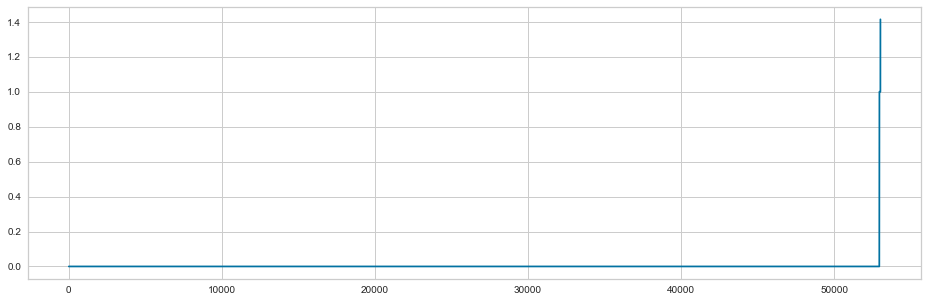

In [63]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [64]:
m = DBSCAN(eps=0.3, min_samples=500)
m.fit(test)

DBSCAN(eps=0.3, min_samples=500)

In [65]:
dbscan_data=test.copy()
dbscan_data['cluster'] = m.labels_
dbscan_data.sort_values(by='cluster')

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,cluster
48333,1,1,0,0,1,1,0,1,1,-1
37471,0,0,0,0,0,1,0,1,0,-1
37472,1,1,0,1,0,1,0,0,0,-1
48134,1,1,1,0,0,1,0,1,0,-1
7970,0,1,0,0,0,1,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
31056,1,1,0,0,0,0,0,1,0,7
24981,1,1,0,0,0,0,0,1,0,7
30157,1,1,0,0,0,0,0,1,0,7
50868,1,1,0,0,0,0,0,1,0,7


In [70]:
all=dbscan_data.copy()
all.drop(['cluster'],axis=1,  inplace=True)
all.insert(0, 'counts', len(all.index))
all=all.mean(axis=0)
all

counts                 53020.000000
cough                      0.149830
fever                      0.088853
sore_throat                0.015221
shortness_of_breath        0.012033
head_ache                  0.022199
corona_result              0.090438
age_60_and_above           0.145285
gender                     0.486496
test_indication            0.057375
dtype: float64

In [71]:
for i in range(-1,8):
    all= cluster(dbscan_data, all, i)

In [72]:
all.columns=['all', 'cluser 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 8']
all

,all,cluser 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8
counts,53020.000000,6614.000000,17134.0,19044.0,1271.0,3024.0,2941.0,1507.0,741.0,744.0
cough,0.149830,0.556547,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
fever,0.088853,0.487753,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
sore_throat,0.015221,0.122014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shortness_of_breath,0.012033,0.096462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
head_ache,0.022199,0.177956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corona_result,0.090438,0.724977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
age_60_and_above,0.145285,0.262776,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
gender,0.486496,0.560024,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
test_indication,0.057375,0.459933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## as preprocessing

In [73]:
## all_features
y=dbscan_data.corona_result

features_all=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_all =dbscan_data[features_all]
X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
print(sorted(Counter(y_resampled_all_re).items()))

[(0, 48225), (1, 48225)]


In [74]:
X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
print(sorted(Counter(y_resampled_all_re).items()))

[(0, 48225), (1, 48225)]


In [75]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_resampled_all_re, y_resampled_all_re, test_size=0.2, random_state=random_state)

In [76]:
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,1,0,0,0,-1
26247,0,0,0,0,0,0,1,0,0
18022,0,0,0,0,0,0,1,0,0
36027,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,0
63301,0,1,0,0,0,0,0,1,-1
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,0


### XGBoost

In [77]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              slient=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [78]:
model_type="XGBoost (all) SMOTE"
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [79]:
dbscan_result=X_test_all.copy()
dbscan_result["corona_result"]=y_test_all
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,1,0,0,0,-1
26247,0,0,0,0,0,0,1,0,0
18022,0,0,0,0,0,0,1,0,0
36027,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,0
63301,0,1,0,0,0,0,0,1,-1
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,0


In [80]:
dbscan_result["xgb_all"]=predicted_all
dbscan_result

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
34771,0,0,0,0,0,0,0,0,1,0,0
68146,0,1,0,0,1,0,0,0,-1,1,1
26247,0,0,0,0,0,0,1,0,0,0,0
18022,0,0,0,0,0,0,1,0,0,0,0
36027,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,0,0,0
63301,0,1,0,0,0,0,0,1,-1,1,1
26577,0,0,0,0,0,0,0,0,1,0,0
35688,0,0,0,0,0,0,1,0,0,0,0


In [81]:
xgb_all_fn=dbscan_result[(dbscan_result['corona_result']==1) & (dbscan_result['xgb_all']==0)]
xgb_all_fn.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN
0,NaN,32.0,32.0,32.0,32.0,NaN,32.0,32.0,NaN,NaN,32.0
1,32.0,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,32.0,NaN


#### False Positive

In [82]:
xgb_all_fp=dbscan_result[(dbscan_result['corona_result']==0) & (dbscan_result['xgb_all']==1)]
xgb_all_fp.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.0,NaN,NaN
0,107.0,145.0,297.0,293.0,296.0,189.0,123.0,184.0,NaN,307.0,NaN
1,200.0,162.0,10.0,14.0,11.0,118.0,184.0,123.0,NaN,NaN,307.0


Accuracy: 0.98
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9621
           1       0.97      1.00      0.98      9669

    accuracy                           0.98     19290
   macro avg       0.98      0.98      0.98     19290
weighted avg       0.98      0.98      0.98     19290



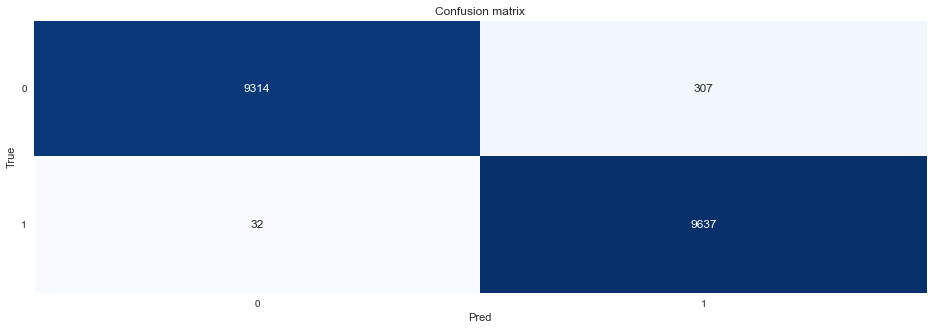

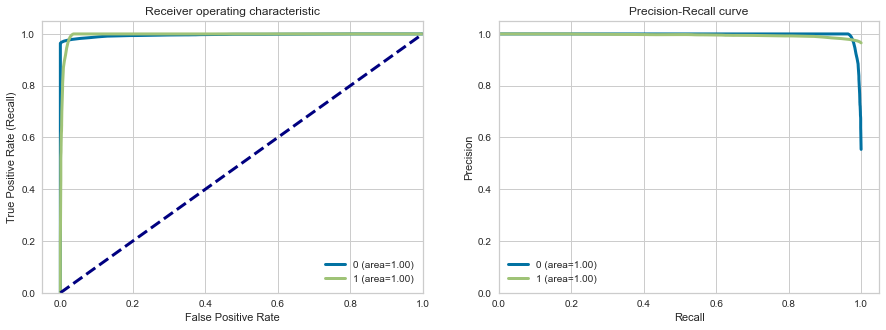

In [83]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# 把結果加進result_df
result_df = result_df.append({'model_type': model_type, 'Accuracy': accuracy, 'AUC': auc,
                             'F1-score': f1, 'Recall': recall_all, 'Precision': precision_all}, ignore_index=True)
roc_auc_all[model_type] = roc_auc

### Gradient Boosting

In [84]:
model_type="Gradient Boosting (all) SMOTE"
gb_all = GradientBoostingClassifier()
gb_all.fit(X_train_all, y_train_all)

GradientBoostingClassifier()

In [85]:
predicted_all = gb_all.predict(X_test_all)
predicted_prob_all = gb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [86]:
result_gb=X_test_all.copy()
result_gb["corona_result"]=y_test_all
X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,1,0,0,0,-1
26247,0,0,0,0,0,0,1,0,0
18022,0,0,0,0,0,0,1,0,0
36027,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,0
63301,0,1,0,0,0,0,0,1,-1
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,0


In [87]:
result_gb["gb_all"]=predicted_all
result_gb

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all
34771,0,0,0,0,0,0,0,0,1,0,0
68146,0,1,0,0,1,0,0,0,-1,1,1
26247,0,0,0,0,0,0,1,0,0,0,0
18022,0,0,0,0,0,0,1,0,0,0,0
36027,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,0,0,0
63301,0,1,0,0,0,0,0,1,-1,1,1
26577,0,0,0,0,0,0,0,0,1,0,0
35688,0,0,0,0,0,0,1,0,0,0,0


In [88]:
gb_all_fn=result_gb[(result_gb['corona_result']==1) & (result_gb['gb_all']==0)]
gb_all_fn.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all


#### False Positive

In [89]:
gb_all_fp=result_gb[(result_gb['corona_result']==0) & (result_gb['gb_all']==1)]
gb_all_fp.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,gb_all
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,NaN,NaN
0,107.0,184.0,336.0,332.0,335.0,189.0,162.0,223.0,NaN,346.0,NaN
1,239.0,162.0,10.0,14.0,11.0,157.0,184.0,123.0,NaN,NaN,346.0


Accuracy: 0.98
Auc: 0.99
Detail:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9621
           1       0.97      1.00      0.98      9669

    accuracy                           0.98     19290
   macro avg       0.98      0.98      0.98     19290
weighted avg       0.98      0.98      0.98     19290



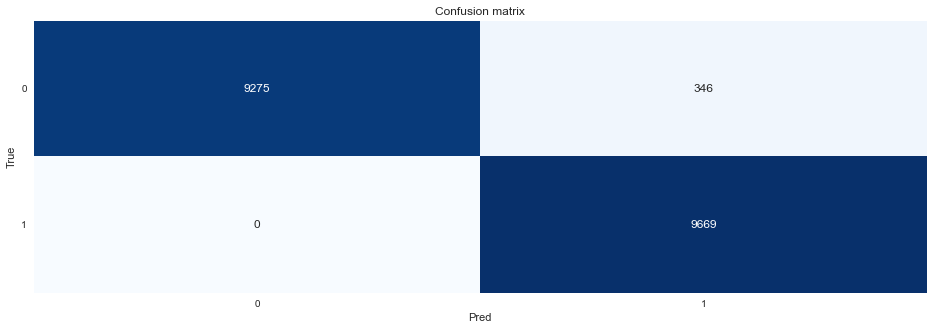

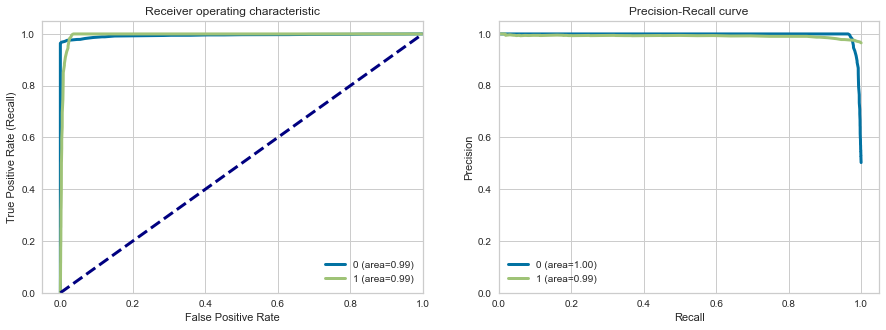

In [90]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all)
precision_all=precision_score(y_test_all, predicted_all)
recall_all=recall_score(y_test_all, predicted_all)

print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# 把結果加進result_df
result_df = result_df.append({'model_type': model_type, 'Accuracy': accuracy, 'AUC': auc, 'F1-score': f1, 'Recall':recall_all, 'Precision':precision_all}
                             , ignore_index=True)
roc_auc_all[model_type] = roc_auc

# Hierarchical Clustering

In [55]:
# data_hc=test.copy()
# data_hc.drop(['cluster'], axis=1, inplace=True)
# data_hc

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
53838,1,1,0,0,0,0,1,0,0
53839,1,1,1,0,1,0,0,0,0
53840,1,0,0,0,0,0,0,0,0
53841,1,0,0,0,0,0,0,1,0


In [56]:
# hc=sch.linkage(data_hc, metric='euclidean', method='ward')

In [57]:
# plt.figure(figsize = (15, 10))
# sch.dendrogram(hc)
# plt.title('Hierarchical Clustering')
# plt.xlabel('indices')
# plt.ylabel('distance')
# plt.show()

: 

: 

In [ ]:
# plt.figure(figsize = (15, 10))
# plt.title("Hiyearşik Kümeleme - Dendrogram")
# plt.xlabel('indices')
# plt.ylabel('distance')
# sch.dendrogram(hc,
#           truncate_mode="lastp",
#           p = 4,
#           show_contracted=True)

In [ ]:
# hierarchical  = AgglomerativeClustering(n_clusters = 4,
#                                   affinity= "euclidean",
#                                   linkage = "ward").fit_predict(metadata)

In [ ]:
# dfff = metadata.copy()
# dfff["Clusters for Hierarchical"] = hierarchical
# dfff[0:5]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster,Clusters for Hierarchical
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


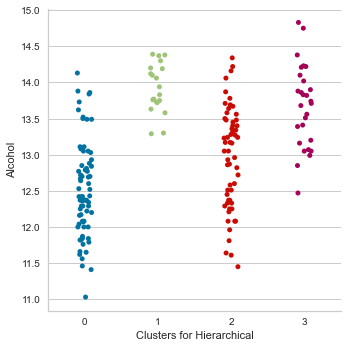

In [ ]:
# sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

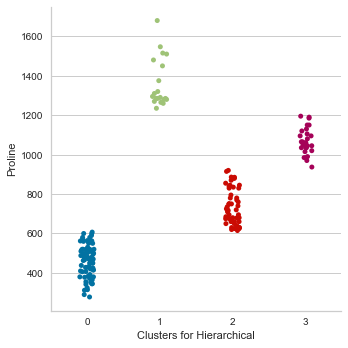

In [ ]:
# sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)

# KMedoids

In [13]:
# kmed_data=test.copy()
# # kmed_data.drop(['cluster'], axis=1, inplace=True)
# kmed_data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
53838,1,1,0,0,0,0,1,0,0
53839,1,1,1,0,1,0,0,0,0
53840,1,0,0,0,0,0,0,0,0
53841,1,0,0,0,0,0,0,1,0


In [14]:
# silhouette_avg = []
# inertia_list = []
# for i in range(2,11):
#     kmedoids_fit = KMedoids(n_clusters = i, max_iter=10 ,init='k-medoids++', random_state=random_state).fit(kmed_data)
#     silhouette_avg.append(silhouette_score(kmed_data, kmedoids_fit.labels_))
#     inertia_list.append(kmedoids_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

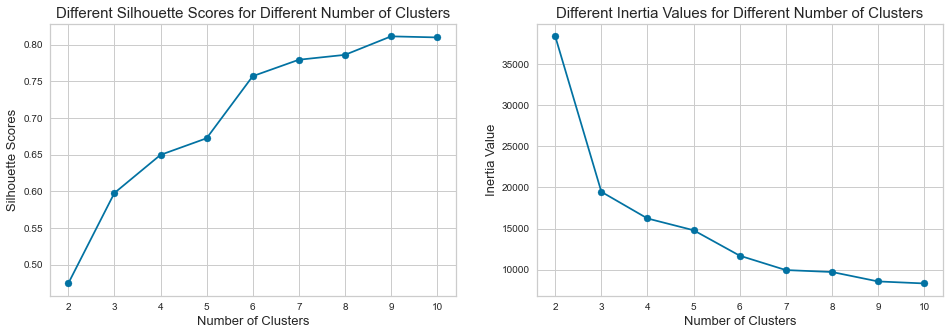

In [15]:
# plt.rcParams['figure.figsize'] = [16,5]
# sns.set_style("whitegrid")
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plt.subplot(121)
# plt.plot(range(2, 11), silhouette_avg)
# plt.scatter(range(2, 11), silhouette_avg)
# plt.xlabel("Number of Clusters", size=13)
# plt.ylabel("Silhouette Scores", size=13)
# plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

# plt.subplot(122)
# plt.plot(range(2,11),inertia_list)
# plt.scatter(range(2,11),inertia_list)
# plt.xlabel("Number of Clusters", size=13)
# plt.ylabel("Inertia Value", size=13)
# plt.title("Different Inertia Values for Different Number of Clusters", size=15)

In [17]:
# #Train the Model
# kmedoids = KMedoids(n_clusters=9, max_iter=10, init='k-medoids++',random_state=random_state).fit(kmed_data)
# kmed_data['cluster'] = kmedoids.labels_

In [16]:
# kmedoids.inertia_

19465.157226606338

In [17]:
# kmedoids.cluster_centers_

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [ ]:
# all=kmed_data.copy()
# all.drop(['cluster'],axis=1,  inplace=True)
# all.insert(0, 'counts', len(all.index))
# all=all.mean(axis=0)
# all

In [ ]:
# for i in range(6):
#     all= cluster(kmed_data, all, i)

In [ ]:
# all.columns=['all', 'cluser 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
# all

## as preprocessing

In [ ]:
# ## all_features
# y=kmed_data.corona_result

# features_all=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
# X_all =kmed_data[features_all]
# X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
# print(sorted(Counter(y_resampled_all_re).items()))

In [ ]:
# X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
# print(sorted(Counter(y_resampled_all_re).items()))

In [ ]:
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_resampled_all_re, y_resampled_all_re, test_size=0.2, random_state=random_state)

In [ ]:
# X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,0,0,1,1,4
26247,0,0,0,0,0,0,1,0,2
18022,0,0,0,0,0,0,1,0,2
36027,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2
63301,0,0,1,0,0,0,1,0,2
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,2


### XGBoost

In [ ]:
# xgb_all = XGBClassifier(learning_rate=0.1,
#                       n_estimators=20,           # 树的个数-10棵树建立xgboost
#                       max_depth=10,               # 树的深度
#                       min_child_weight = 1,      # 叶子节点最小权重
#                       gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                       subsample=1,               # 所有样本建立决策树
#                       colsample_btree=1,         # 所有特征建立决策树
#                       scale_pos_weight=1,        # 解决样本个数不平衡的问题
#                       random_state=42,           # 随机数
#                       slient = 0
#                       )
# # xgb_all=XGBClassifier()
# xgb_all.fit(X_train_all,y_train_all)

c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              slient=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
# model_type="XGBoost (all) SMOTE"
# predicted_all = xgb_all.predict(X_test_all)
# predicted_prob_all = xgb_all.predict_proba(X_test_all)

# # accuracy=accuracy_score(y_test, predicted)
# # confusion=confusion_matrix(y_test, predicted)

# # print("Accurracy: ", accuracy)
# # print("Confusion Matrix: ", confusion)

#### False Negative

In [ ]:
# kmed_result=X_test_all.copy()
# kmed_result["corona_result"]=y_test_all
# X_test_all

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster
34771,0,0,0,0,0,0,0,0,1
68146,0,1,0,0,0,0,1,1,4
26247,0,0,0,0,0,0,1,0,2
18022,0,0,0,0,0,0,1,0,2
36027,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2
63301,0,0,1,0,0,0,1,0,2
26577,0,0,0,0,0,0,0,0,1
35688,0,0,0,0,0,0,1,0,2


In [ ]:
# kmed_result["xgb_all"]=predicted_all
# kmed_result

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
34771,0,0,0,0,0,0,0,0,1,0,0
68146,0,1,0,0,0,0,1,1,4,1,1
26247,0,0,0,0,0,0,1,0,2,0,0
18022,0,0,0,0,0,0,1,0,2,0,0
36027,0,0,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4097,0,0,0,0,0,0,1,0,2,0,0
63301,0,0,1,0,0,0,1,0,2,1,1
26577,0,0,0,0,0,0,0,0,1,0,0
35688,0,0,0,0,0,0,1,0,2,0,0


In [ ]:
# xgb_all_fn=kmed_result[(kmed_result['corona_result']==1) & (kmed_result['xgb_all']==0)]
# xgb_all_fn.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
0,1041.0,1291.0,1288.0,1291.0,1291.0,1019.0,654.0,1291.0,208,NaN,1291.0
1,250.0,NaN,3.0,NaN,NaN,272.0,637.0,NaN,320,1291.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN


#### False Positive

In [ ]:
# xgb_all_fp=kmed_result[(kmed_result['corona_result']==0) & (kmed_result['xgb_all']==1)]
# xgb_all_fp.apply(pd.Series.value_counts)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,cluster,corona_result,xgb_all
0,18.0,52.0,61.0,56.0,55.0,10.0,12.0,51.0,2,63.0,NaN
1,45.0,11.0,2.0,7.0,8.0,53.0,51.0,12.0,3,NaN,63.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN


Accuracy: 0.93
Auc: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9621
           1       0.99      0.87      0.93      9669

    accuracy                           0.93     19290
   macro avg       0.94      0.93      0.93     19290
weighted avg       0.94      0.93      0.93     19290



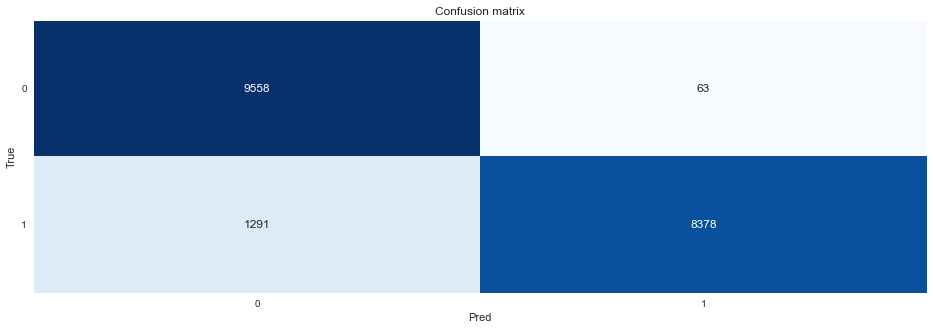

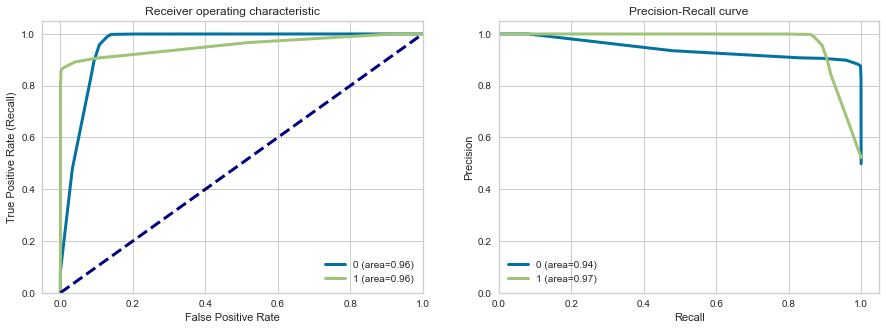

In [ ]:
# classes = np.unique(y_test_all)
# y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

# ## Accuracy, Precision, Recall
# accuracy = metrics.accuracy_score(y_test_all, predicted_all)
# auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
#                             multi_class="ovr")
# f1=f1_score(y_test_all, predicted_all, average='weighted')
# precision_all=precision_score(y_test_all, predicted_all, average='weighted')
# recall_all=recall_score(y_test_all, predicted_all, average='weighted')
# print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
# print("Detail:")
# print(metrics.classification_report(y_test_all, predicted_all))
    
# ## Plot confusion matrix
# cm = metrics.confusion_matrix(y_test_all, predicted_all)
# fig, ax = plt.subplots()
# sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
#             cbar=False)
# ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
#        yticklabels=classes, title="Confusion matrix")
# plt.yticks(rotation=0)

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# ## Plot roc
# roc_auc_dict = {}
# for i in range(len(classes)):
#     fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
#                            predicted_prob_all[:,i])
#     roc_auc = metrics.auc(fpr, tpr)
#     ax[0].plot(fpr, tpr, lw=3, 
#             #   label='{0} (area={1:0.2f})'.format(classes[i], 
#             #                   metrics.auc(fpr, tpr))
#                 label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
#                )
#     roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
# ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
# ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
#           xlabel='False Positive Rate', 
#           ylabel="True Positive Rate (Recall)", 
#           title="Receiver operating characteristic")
# ax[0].legend(loc="lower right")
# ax[0].grid(True)
    
# ## Plot precision-recall curve
# for i in range(len(classes)):
#     precision, recall, thresholds = metrics.precision_recall_curve(
#                  y_test_array[:,i], predicted_prob_all[:,i])
#     ax[1].plot(recall, precision, lw=3, 
#                label='{0} (area={1:0.2f})'.format(classes[i], 
#                                   metrics.auc(recall, precision))
#               )
# ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
#           ylabel="Precision", title="Precision-Recall curve")
# ax[1].legend(loc="best")
# ax[1].grid(True)
# plt.show()